<a href="https://colab.research.google.com/github/JisbethDiaz/ARCHIVOS-VARIOS/blob/Miner%C3%ADa-de-datos/Ejercicio_pr%C3%A1ctico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ÁRBOL DE DECISIÓN**

##Leyendo el archivo

In [403]:
import pandas as pd 
d = pd.read_csv('DATA.csv', encoding= 'unicode_escape') 

Dimensiones de la tabla

In [404]:
d.shape

(54067, 17)

Identificando encabezado

In [405]:
d.columns

Index(['ID_Cliente', 'ID_Grupo', 'Ciclo', 'F_Inicio', 'Monto', 'Cuota',
       'Plazo', 'Sucursal', 'Nacionalidad', 'F_Nacimiento', 'Edad', 'Sexo',
       'Entidad_Nacimiento', 'Entidad_Residencia', 'CodigoPostal',
       'IngresoMensual', 'Liquido'],
      dtype='object')

##Identificando tipo de dato

In [363]:
d.dtypes

ID_Cliente              int64
ID_Grupo                int64
Ciclo                   int64
F_Inicio               object
Monto                   int64
Cuota                 float64
Plazo                   int64
Sucursal                int64
Nacionalidad           object
F_Nacimiento           object
Edad                  float64
Sexo                    int64
Entidad_Nacimiento    float64
Entidad_Residencia      int64
CodigoPostal          float64
IngresoMensual          int64
Liquido                object
dtype: object

In [364]:
nd= d[[ 'Ciclo', 'Monto', 'Cuota','Edad', 'Sexo', 'Entidad_Residencia',
        'IngresoMensual', 'Liquido']]
    

In [365]:
nd.dtypes

Ciclo                   int64
Monto                   int64
Cuota                 float64
Edad                  float64
Sexo                    int64
Entidad_Residencia      int64
IngresoMensual          int64
Liquido                object
dtype: object

In [366]:
nd.isnull().any()

Ciclo                 False
Monto                 False
Cuota                 False
Edad                   True
Sexo                  False
Entidad_Residencia    False
IngresoMensual        False
Liquido               False
dtype: bool

In [367]:
nd = nd_drop = nd.dropna() # Con esta instrucción borramos las filas que contienen datos nulos

In [368]:
nd.isnull().any()

Ciclo                 False
Monto                 False
Cuota                 False
Edad                  False
Sexo                  False
Entidad_Residencia    False
IngresoMensual        False
Liquido               False
dtype: bool

## PROCESO

In [369]:
nd.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54065 entries, 0 to 54066
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ciclo               54065 non-null  int64  
 1   Monto               54065 non-null  int64  
 2   Cuota               54065 non-null  float64
 3   Edad                54065 non-null  float64
 4   Sexo                54065 non-null  int64  
 5   Entidad_Residencia  54065 non-null  int64  
 6   IngresoMensual      54065 non-null  int64  
 7   Liquido             54065 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 3.7+ MB


In [370]:
#Variable predictora
x= nd.iloc[:,0:7]

#Variable a predecir
y = nd.iloc[:,7]

#Mostramos las primeras 5 filas
x.head()

,Ciclo,Monto,Cuota,Edad,Sexo,Entidad_Residencia,IngresoMensual
0,40,79000,5490.48,57.0,1,19,90000
1,40,34000,2362.99,57.0,1,19,52000
2,40,70000,4864.98,47.0,1,19,70000
3,40,73000,5073.48,47.0,1,19,70000
4,40,16000,1112.00,55.0,1,19,30000


Dividiendo nuestros datos en tablas




In [371]:
from sklearn.model_selection import train_test_split

#x_t y y_t para crear el modelo
#x_p y y_p para pruebar que tan bueno es el modelo
x_t, x_p, y_t, y_p = train_test_split(x,y,train_size=0.75,random_state=0)

In [372]:
x_t.info()
#Sexo 1-F  2-M

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40548 entries, 39048 to 2732
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ciclo               40548 non-null  int64  
 1   Monto               40548 non-null  int64  
 2   Cuota               40548 non-null  float64
 3   Edad                40548 non-null  float64
 4   Sexo                40548 non-null  int64  
 5   Entidad_Residencia  40548 non-null  int64  
 6   IngresoMensual      40548 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.5 MB


Creamos el modelo del árbol de decisión

#GRAFICANDO

### NOTAS: 
* Flechas a la izquierda son "Verdadero", y a la derecha "Falso"



In [377]:
from sklearn.tree import DecisionTreeClassifier

#max_depth = Niveles del arbol
arbol = DecisionTreeClassifier(max_depth=4)
#arbol = DecisionTreeClassifier()

#Modelo
#v. predictora , v a predecir
arbol_p = arbol.fit(x_t, y_t)


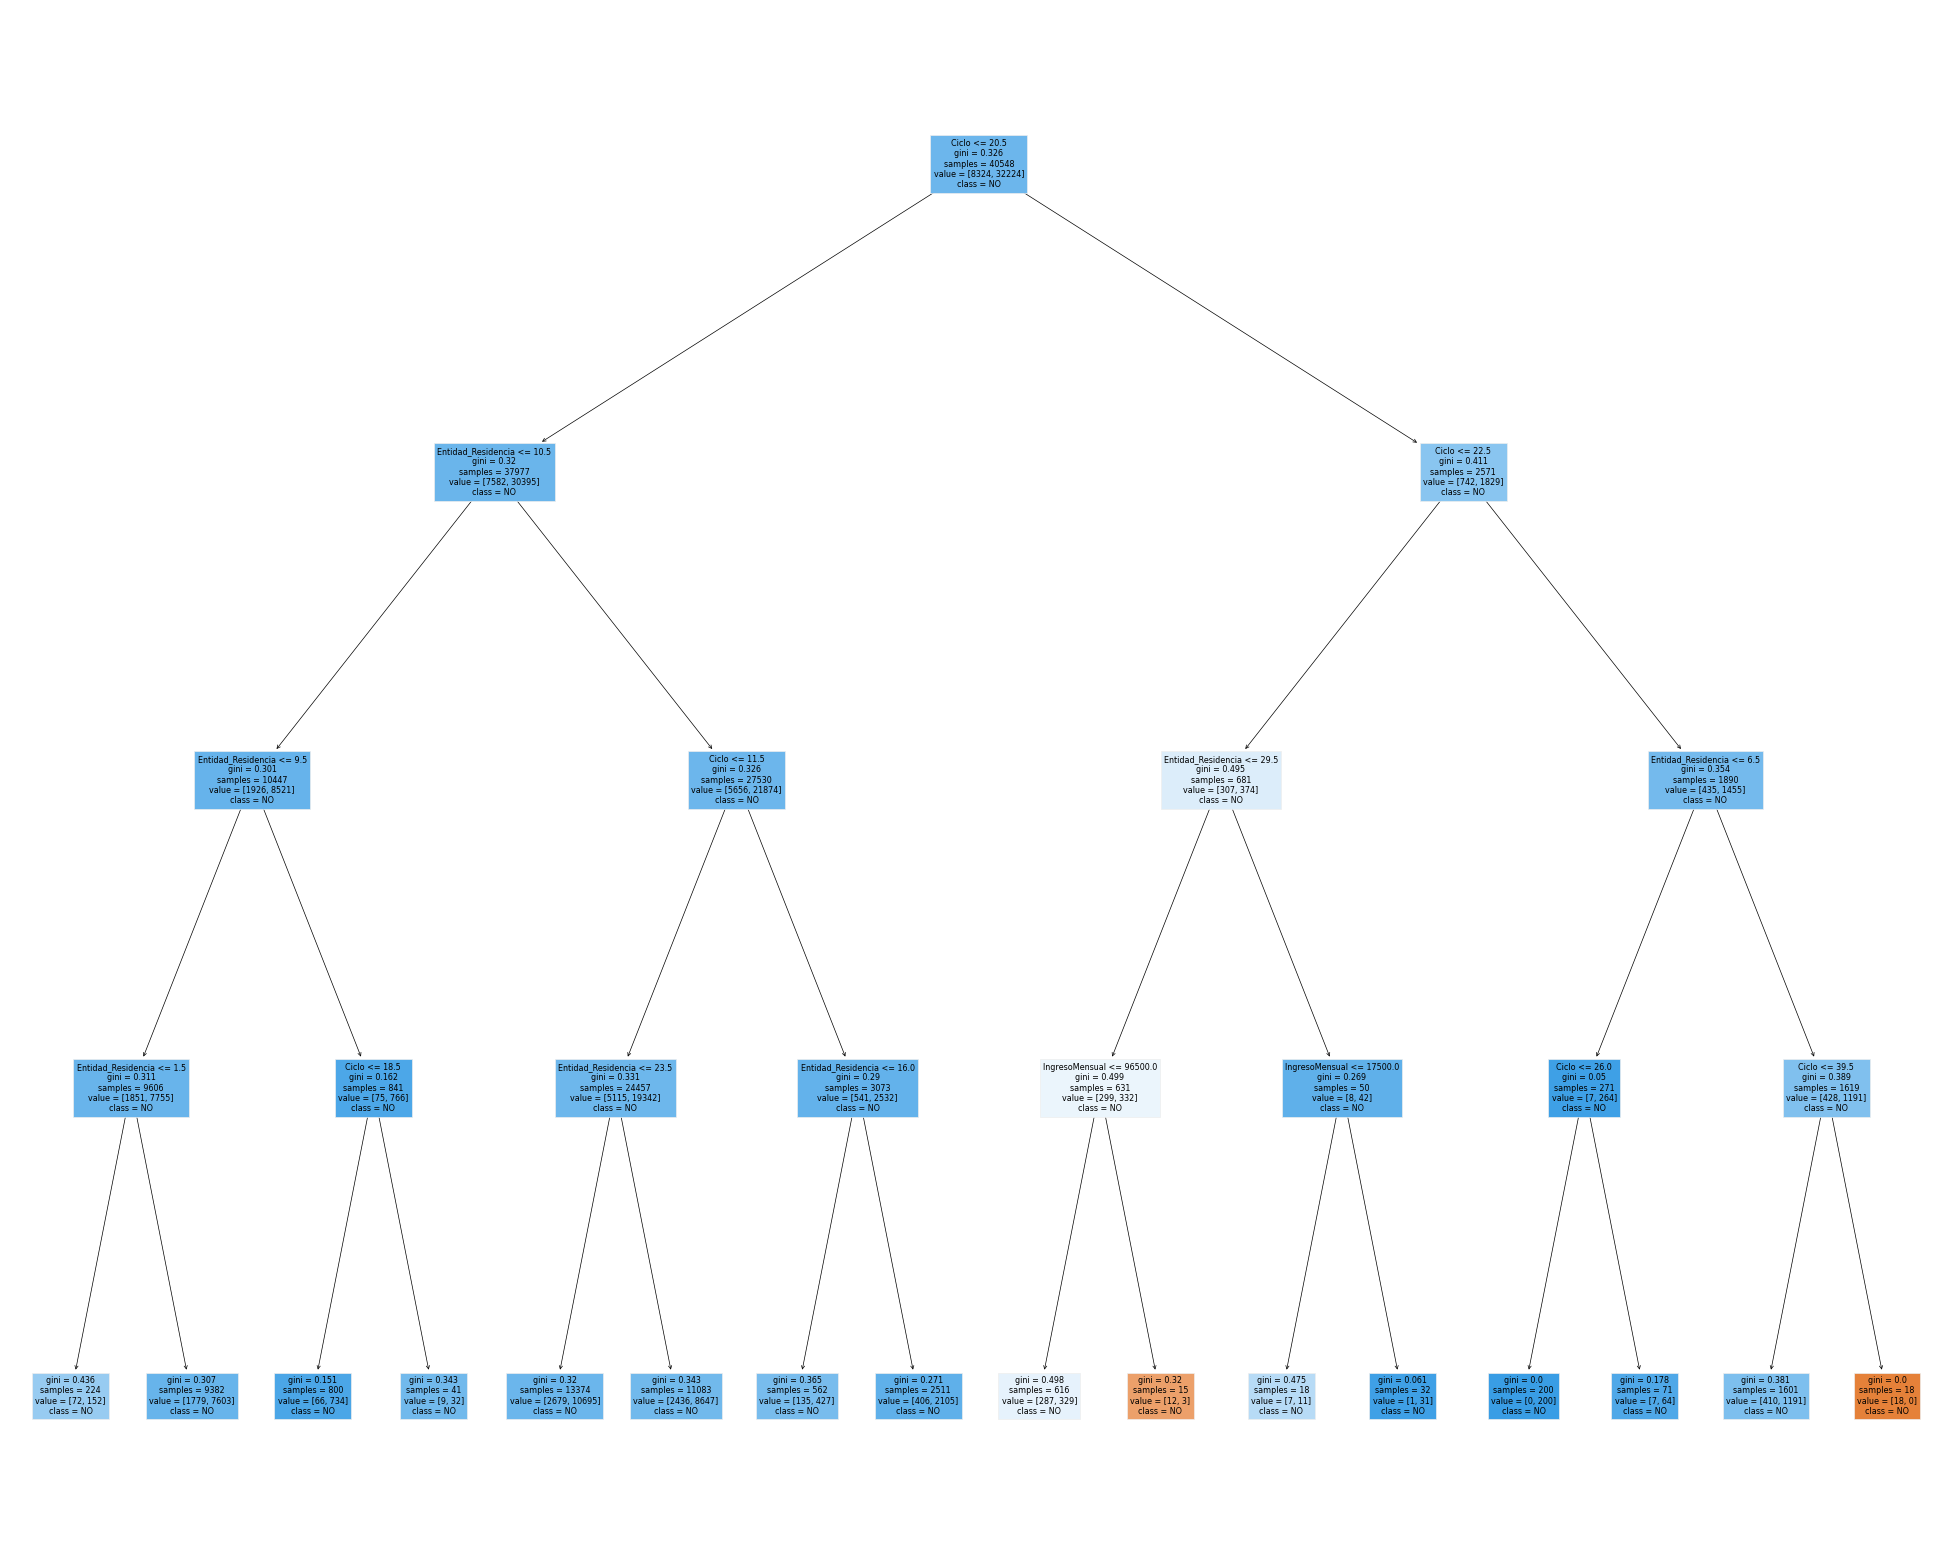

In [378]:
from matplotlib import pyplot as plt
from sklearn import tree

figura = plt.figure ( figsize=(25,20) )


tree.plot_tree( arbol_p, feature_names= list(x.columns.values),
               class_names= list(y.values), filled=True)


plt.show()

In [379]:
#¿Qué tan bueno es para predecir?
y_pred = arbol_p.predict(x_p)
y_pred

array(['SI', 'SI', 'SI', ..., 'SI', 'SI', 'SI'], dtype=object)

## Calculando precisión del modelo

In [390]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion: mc
mc = confusion_matrix(y_p, y_pred)
mc

array([[   16,  2779],
       [    2, 10720]])

*Matriz (valores reales en filas y en colunmnas valores predichos)
*Esto es 2795 individuos cuya clase es sí y 10722 cuya clase es no
*Pero al predecir se obtuvieron 2779 con Sí y 10720 con no
* Valores diagonales con predicción correcta (16 y 10720)
* Valores de diagonal inversa con predicción incorrecta (2779,2)

In [381]:
#Precisión global del modelo

import numpy as np   #Cálculos avanzados
pg = np.sum( mc.diagonal() ) / np.sum( mc )
pg

0.7942590811570615

In [401]:
#Precisión por clase
pres_si =  (mc[0,0]) / sum(mc[0,])
pres_si

0.005724508050089445

In [402]:
pres_no =  (mc[1,0]) / sum(mc[1,])
pres_no

0.00018653236336504383